In [1]:
from miditok import REMI, get_midi_programs
from miditoolkit import MidiFile
from tqdm.auto import tqdm

import numpy as np
import os
def find_length(folder):
    names = os.listdir(folder)
    fnames = map(lambda fname: os.path.join(folder,fname), names)
    fnames = list(fnames)
    tokenizer = REMI()
    length=[]
    progress = tqdm(range(len(fnames)))
    for name in fnames:
        midi = MidiFile(name)
        tokens = tokenizer.midi_to_tokens(midi)
        length.append(len(tokens[0]))
        progress.update(1)
    
    return np.array(length)

In [13]:
array = find_length("Pop-music/Train")

  0%|          | 0/718 [00:00<?, ?it/s]

In [14]:
array = np.sort(array)
np.save("Pop-music-train-token-length.npy",array)

In [16]:
array[-100:]

array([ 6605,  6634,  6637,  6655,  6667,  6694,  6710,  6714,  6744,
        6758,  6762,  6769,  6775,  6792,  6808,  6819,  6892,  6904,
        6910,  6913,  6928,  6933,  6968,  6992,  7031,  7081,  7112,
        7128,  7138,  7173,  7281,  7335,  7361,  7390,  7409,  7472,
        7511,  7517,  7603,  7670,  7728,  7800,  7850,  7853,  7854,
        7863,  7890,  7910,  7911,  7994,  8003,  8329,  8434,  8466,
        8468,  8487,  8539,  8569,  8577,  8596,  8690,  8792,  8793,
        8814,  8859,  8873,  9158,  9178,  9185,  9804,  9852,  9904,
       10002, 10005, 10185, 10695, 10737, 10762, 10900, 10992, 11028,
       11084, 11168, 11319, 11395, 11436, 11468, 11555, 11951, 12318,
       12383, 12389, 12992, 13225, 13358, 13468, 13754, 14148, 14417,
       21481])

In [17]:
array = find_length("Pop-music/Val")

  0%|          | 0/57 [00:00<?, ?it/s]

In [18]:
array = np.sort(array)
np.save("Pop-music-val-token-length.npy",array)

In [19]:
array[-50:]

array([ 3891,  3926,  4110,  4129,  4292,  4329,  4392,  4404,  4466,
        4518,  4525,  4525,  4580,  4634,  4651,  4654,  4718,  4730,
        4762,  4812,  4813,  4827,  4875,  4876,  4941,  5011,  5066,
        5086,  5164,  5268,  5307,  5667,  5730,  5812,  5832,  5869,
        5914,  6120,  6249,  6479,  6494,  6757,  6901,  8244,  8766,
        9023,  9716, 10665, 14565, 15067])

In [3]:
array = np.load("Pop-music-2-train-token-length.npy")
array2 = np.load("Pop-music-2-val-token-length.npy")
array3 = np.load("Pop-music-train-token-length.npy")
array4 = np.load("Pop-music-val-token-length.npy")

In [2]:
array = np.load("Classical-music-train-token-length.npy")
array2 = np.load("Classical-music-val-token-length.npy")

Total number of training samples:  1358


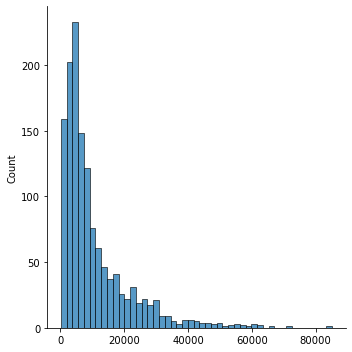

In [3]:
import seaborn as sns
#train_array = np.concatenate([array,array3])
print("Total number of training samples: ", array.shape[0])
sns.displot(array)
#np.save("Pop-train-token-length.npy",train_array)

Total number of validation samples:  201


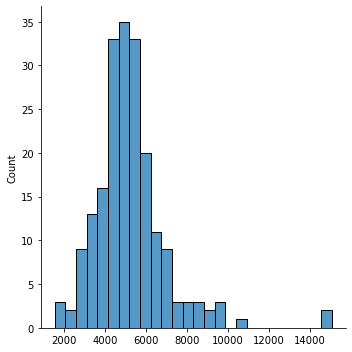

In [32]:
val_array = np.concatenate([array2,array4])
print("Total number of validation samples: ", val_array.shape[0])
sns.displot(val_array)
np.save("Pop-val-token-length.npy",val_array)